In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
import ModelsPlot as model_plot

# 宏观经济变量预测经济增长
# PCA&PLS

In [5]:
Ys_table = pd.read_csv('CHN_Marco_predictors.csv',index_col=0)
Macro_data = pd.read_csv('CHN_Macro_sample.csv',index_col=0)

In [6]:
used_Ytable = Ys_table[['Dates','GDPgrowth']]
merged = pd.merge(Macro_data,used_Ytable,on = 'Dates')

st_month = 201001
ed_month = 201912
Xtodrop = ['Dates','y']##删掉预测值和不能用的指标
Xtodrop_add = [x for x in merged.columns if 'GDP' in x or 'gdp' in x]
Xtodrop = Xtodrop + Xtodrop_add

merged['y'] = merged['GDPgrowth'].shift(-1)##预测变量，预测下一个月
whole_data = merged[(merged['Dates']>=st_month) & (merged['Dates']<=ed_month)].reset_index(drop = True)
whole_data = whole_data.fillna(0)

In [7]:
def Norm(in_df,no_Norm):
    op_df = in_df.copy()
    for col in op_df.columns:
        if col in no_Norm:
            continue
        else:
            col_max = max(op_df[col])
            col_min = min(op_df[col])
            if col_max == col_min:
                continue
            op_df[col] = (op_df[col] - col_min) / (col_max - col_min)
    return op_df

In [28]:
all_month_list = list(whole_data['Dates'].values)
train_month_n = 24
test_month_n = 12
oos_month_n = 1

pca_op = []
pls_op = []


for i in range(len(all_month_list)):
    if i < train_month_n + test_month_n + oos_month_n - 1:
        continue
    else:
        
        train_monthes = all_month_list[i-test_month_n-train_month_n:i-test_month_n]
        test_monthes = all_month_list[i-test_month_n:i]
        oos_month = all_month_list[i]
        print(oos_month)
        
        train_data = whole_data[whole_data['Dates'].apply(lambda x: True if x in train_monthes else False)]
        test_data = whole_data[whole_data['Dates'].apply(lambda x: True if x in test_monthes else False)]
        oos_data = whole_data[whole_data['Dates'] == oos_month]
        

        
        X_train = train_data.drop(columns = Xtodrop)
        y_train = train_data['y']
        
        X_test = test_data.drop(columns = Xtodrop)
        y_test = test_data['y']
        
        X_oos = oos_data.drop(columns = Xtodrop)
        y_oos = oos_data['y']
        
        to_Norm = pd.concat([train_data,test_data,oos_data])
        normed_data = Norm(to_Norm,Xtodrop)
        train_data_normed = normed_data[normed_data['Dates'].apply(lambda x: True if x in train_monthes else False)]
        test_data_normed = normed_data[normed_data['Dates'].apply(lambda x: True if x in test_monthes else False)]
        oos_data_normed = normed_data[normed_data['Dates'] == oos_month]
        
        X_train_normed = train_data_normed.drop(columns = Xtodrop)
        y_train = train_data['y']
        
        X_test_normed = test_data_normed.drop(columns = Xtodrop)
        y_test = test_data['y']
        
        X_oos_normed = oos_data_normed.drop(columns = Xtodrop)
        y_oos = oos_data['y']
        
        
        pca_result = model_plot.PCA_method(X_train_normed,y_train,X_test_normed,y_test,X_oos_normed, test_data_normed, oos_data_normed)
        pls_result = model_plot.PLS_method(X_train,y_train,X_test,y_test,X_oos, test_data, oos_data)
        
        

        pca_op.append(pca_result)         
        pls_op.append(pls_result)
        

201301.0
201302.0
201303.0
201304.0
201305.0
201306.0
201307.0
201308.0
201309.0
201310.0
201311.0
201312.0
201401.0
201402.0
201403.0
201404.0
201405.0
201406.0
201407.0
201408.0
201409.0
201410.0
201411.0
201412.0
201501.0
201502.0
201503.0
201504.0
201505.0
201506.0
201507.0
201508.0
201509.0
201510.0
201511.0
201512.0
201601.0
201602.0
201603.0
201604.0
201605.0
201606.0
201607.0
201608.0
201609.0
201610.0
201611.0
201612.0
201701.0
201702.0
201703.0
201704.0
201705.0
201706.0
201707.0
201708.0
201709.0
201710.0
201711.0
201712.0
201801.0
201802.0
201803.0
201804.0
201805.0
201806.0
201807.0
201808.0
201809.0
201810.0
201811.0
201812.0
201901.0
201902.0
201903.0
201904.0
201905.0
201906.0
201907.0
201908.0
201909.0
201910.0
201911.0
201912.0


# PCA

MSFE:  8.054696622805428e-05
R2: (n = 5) -0.29739003089405647


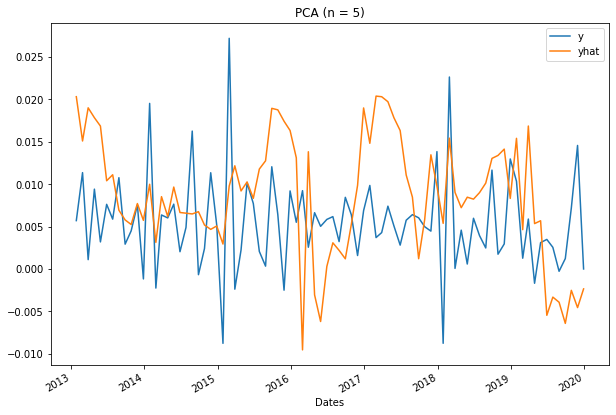

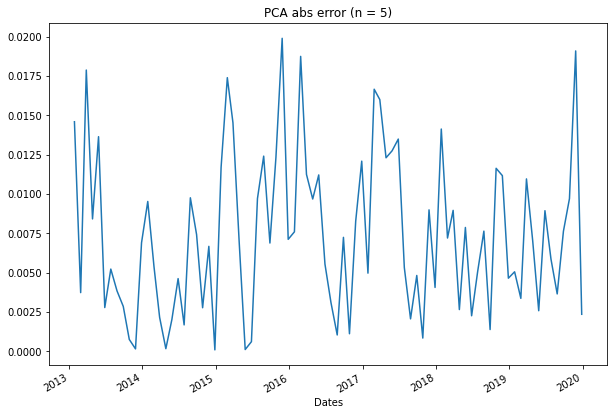

方差解释率：


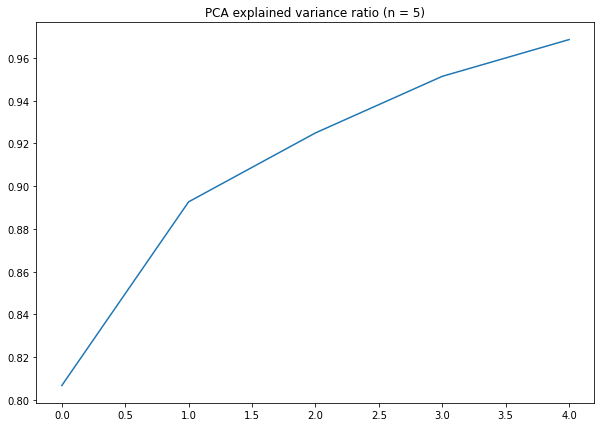

MSFE:  9.003505481184635e-05
R2: (n = 6) -0.45021703502973875


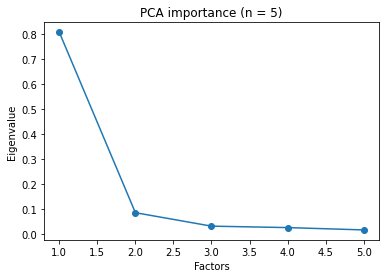

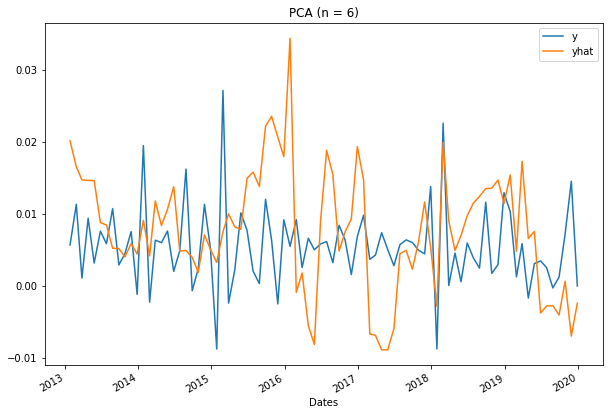

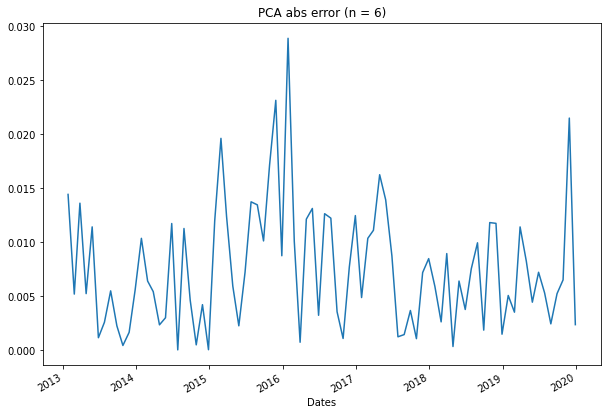

方差解释率：


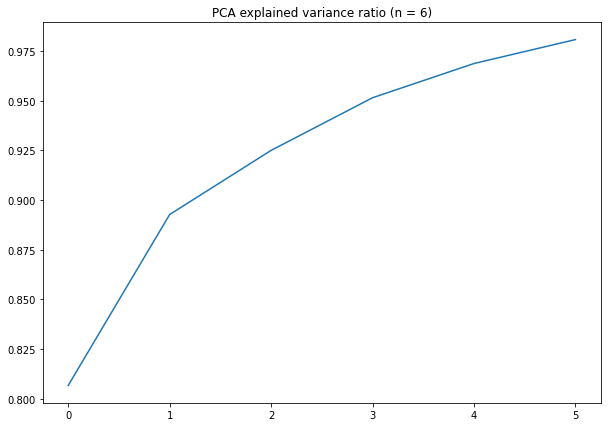

MSFE:  0.00010332323217800755
R2: (n = 7) -0.6642530149175196


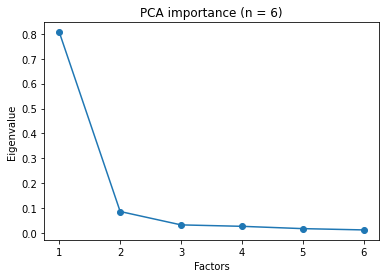

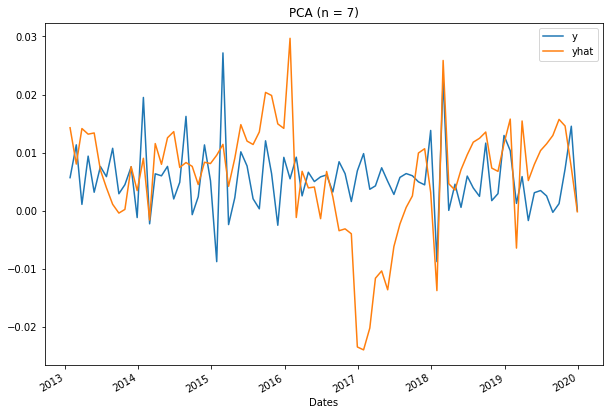

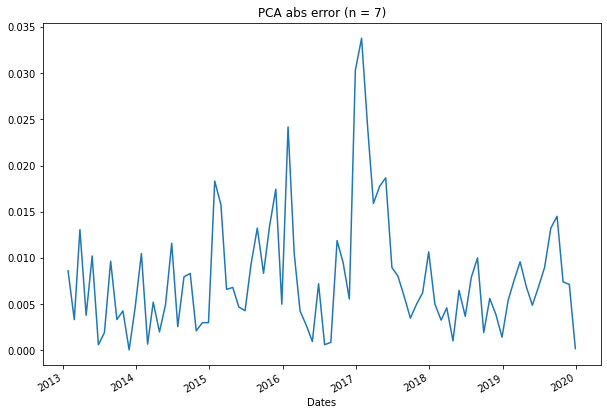

方差解释率：


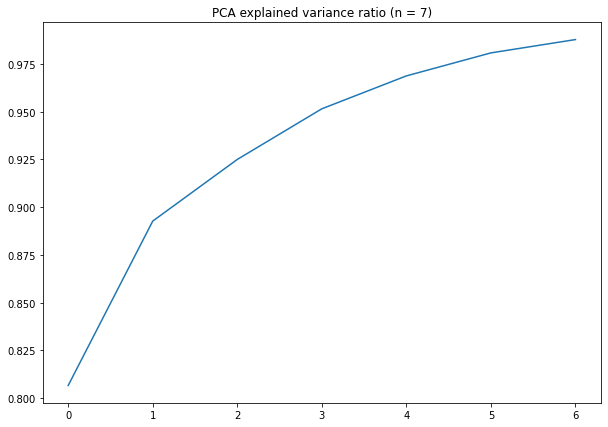

MSFE:  0.00015427062101291714
R2: (n = 8) -1.484875286243648


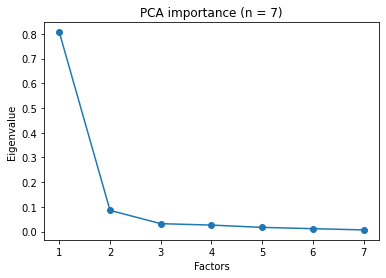

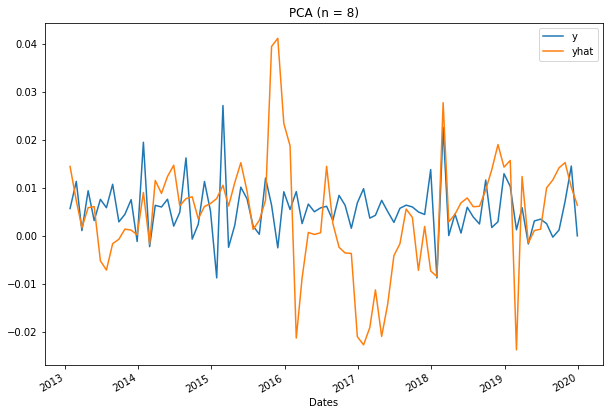

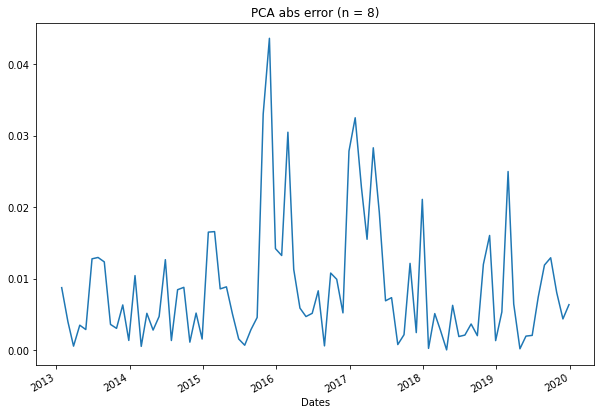

方差解释率：


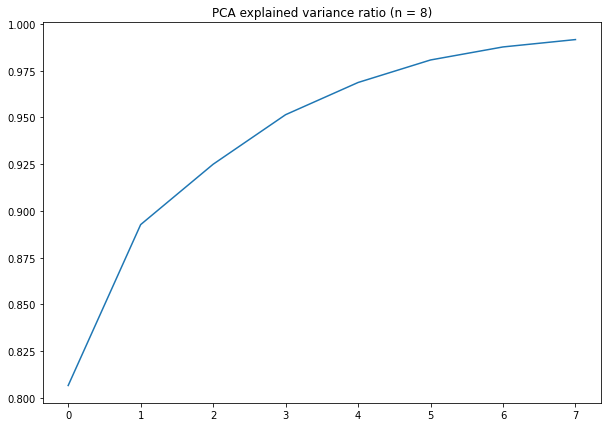

MSFE:  0.0002203657345718224
R2: (n = 9) -2.5494857295388718


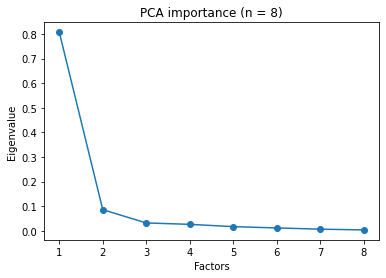

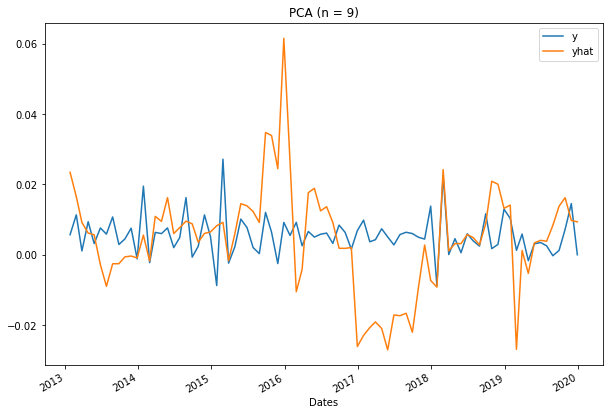

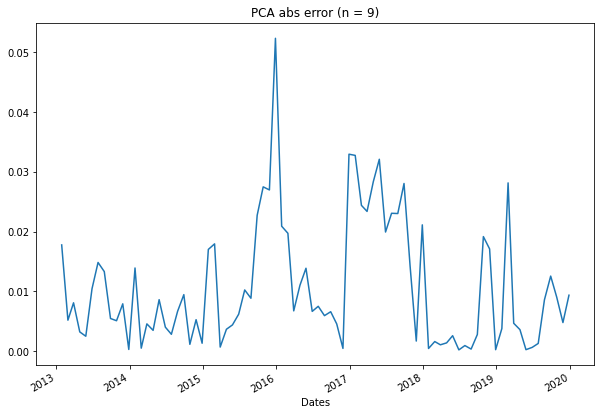

方差解释率：


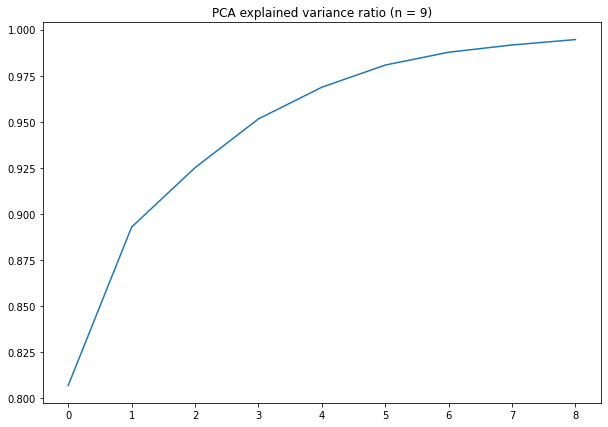

MSFE:  0.00034488037219822563
R2: (n = 10) -4.555073985954372


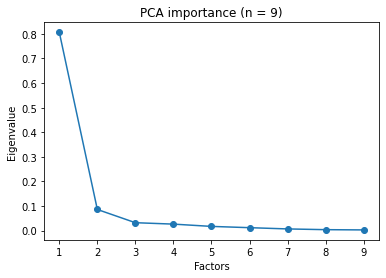

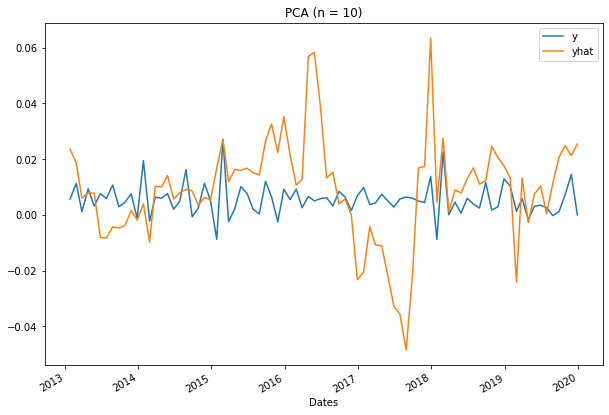

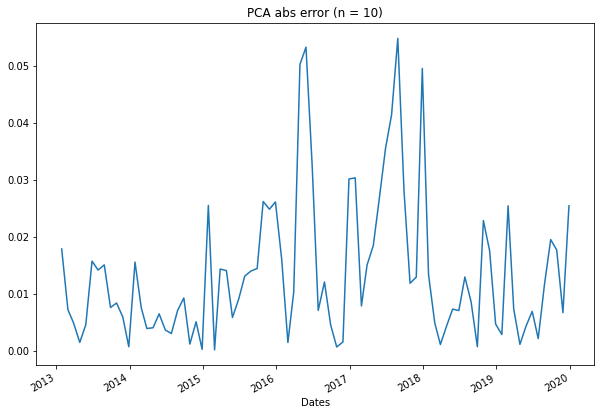

方差解释率：


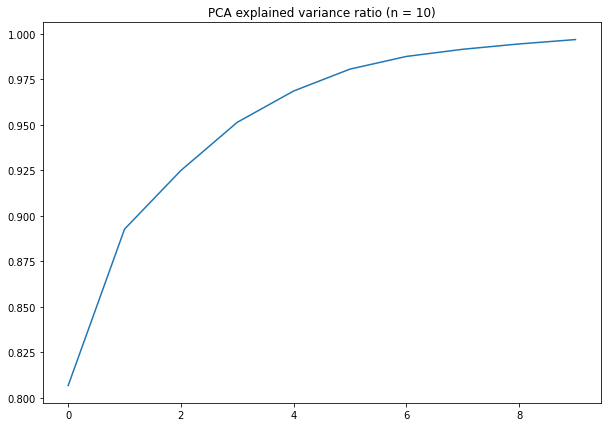

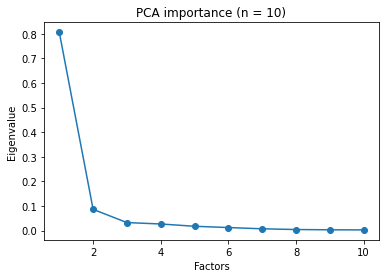

In [35]:
# deal with PCA
all_pred = []
all_best = []
all_importance = {}
all_exp_ratio = {}

for i in range(len(all_month_list)):
    if i < train_month_n + test_month_n + oos_month_n - 1:
        continue
    else:
        result_idx = i - (train_month_n + test_month_n + oos_month_n - 1)
        oos_month = all_month_list[i]
        
        temp_tuning = pca_op[result_idx][0]
        temp_best = pca_op[result_idx][1]
        temp_importance = pca_op[result_idx][2]
        
        temp_exp_ratio = pca_op[result_idx][3]
        
        all_best.append(temp_best)

        all_pred.append(temp_tuning)
        all_importance[oos_month] = temp_importance
        all_exp_ratio[oos_month] = pd.concat(temp_exp_ratio,axis = 1)
        
        
all_pred = pd.concat(all_pred)
all_pred['Dates'] = [datetime.datetime(year = int(x//100),month = int(x%100),day = 28) for x in all_pred['Dates']]
all_pred = all_pred.sort_values(['n','Dates'])
all_pred = all_pred.set_index(['n','Dates'])
        
toplot_importance = all_importance[201812]
toplot_expratio = all_importance[201812]

for n in range(5,11):
    n_pred = all_pred.loc[n]
    msfe = np.sum((n_pred['yhat']-n_pred['y'])**2) / len(n_pred)
    print('MSFE: ', msfe)

    r2 = 1-np.sum((n_pred['yhat']-n_pred['y'])**2)/np.sum(n_pred['y']**2)
    print('R2: (n = %s)'%n, r2)
    n_pred[['y','yhat']].plot(figsize = (10,7),title = 'PCA (n = %s)'%n)
    plt.show()
    
    abs(n_pred['y']- n_pred['yhat']).plot(figsize = (10,7),title = 'PCA abs error (n = %s)'%n)
    plt.show()  
    
    
    print('方差解释率：')
    pd.Series(toplot_expratio[n]).cumsum().plot(figsize = (10,7),title = 'PCA explained variance ratio (n = %s)'%n)
    plt.show()

    plt.scatter(range(1,len(toplot_importance[n])+1),toplot_importance[n])
    plt.plot(range(1,len(toplot_importance[n])+1),toplot_importance[n])
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.title('PCA importance (n = %s)'%n)
    

    


# PLS

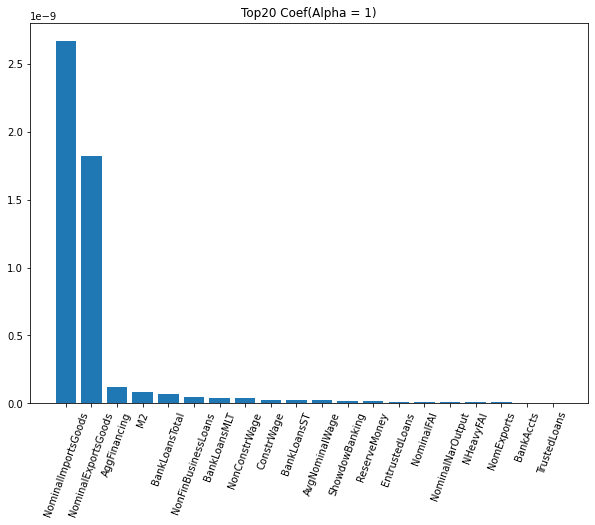

MSFE:  3.350161008865914e-05
R2: (n = 1) 0.4603812286999892


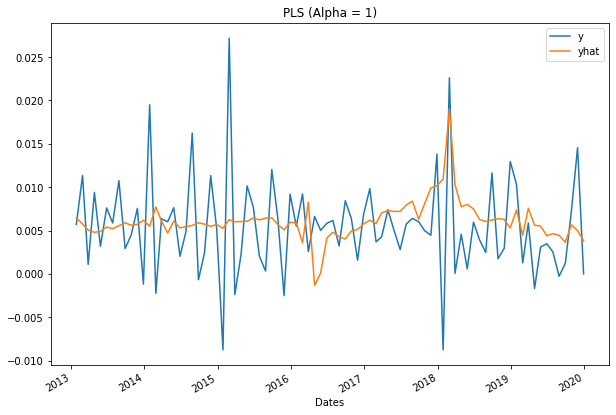

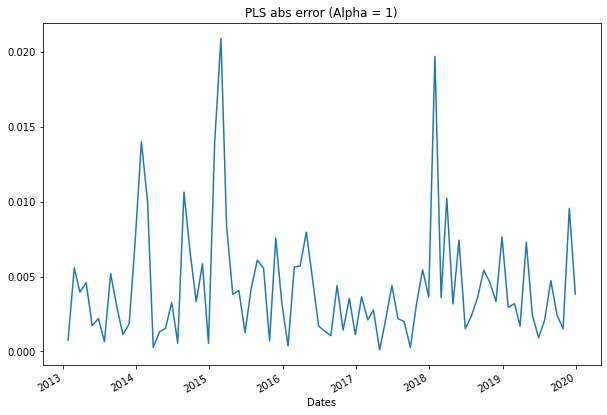

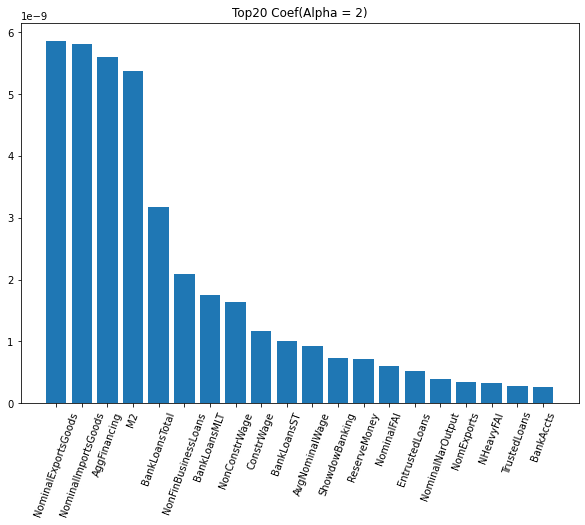

MSFE:  3.973629637877649e-05
R2: (n = 2) 0.35995758498821917


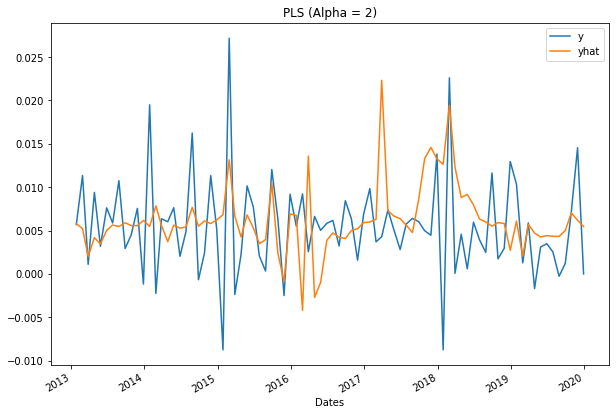

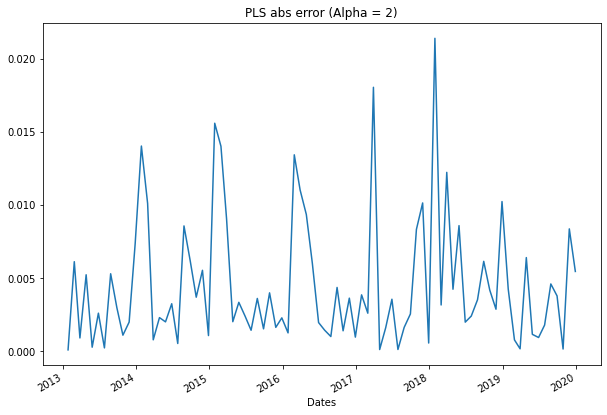

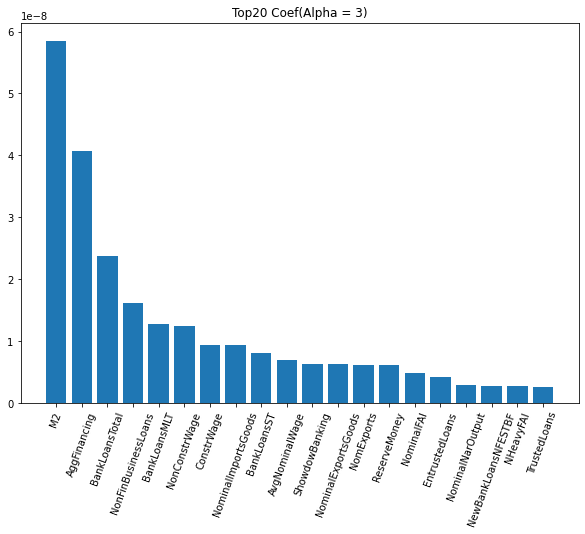

MSFE:  6.651123048565324e-05
R2: (n = 3) -0.0713129421940717


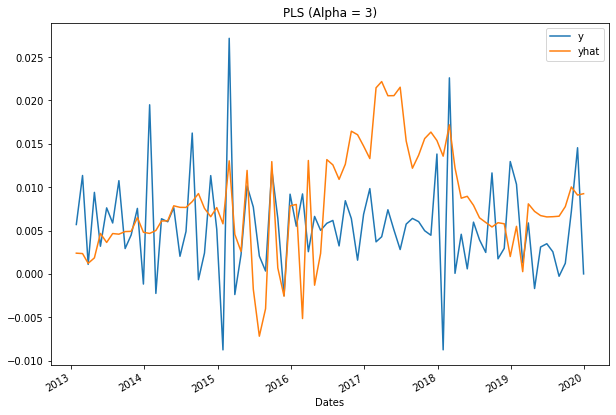

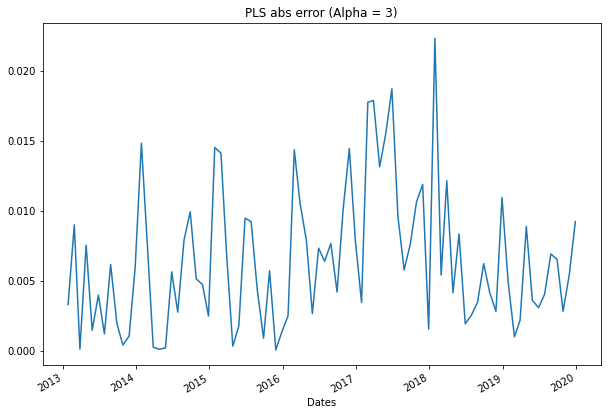

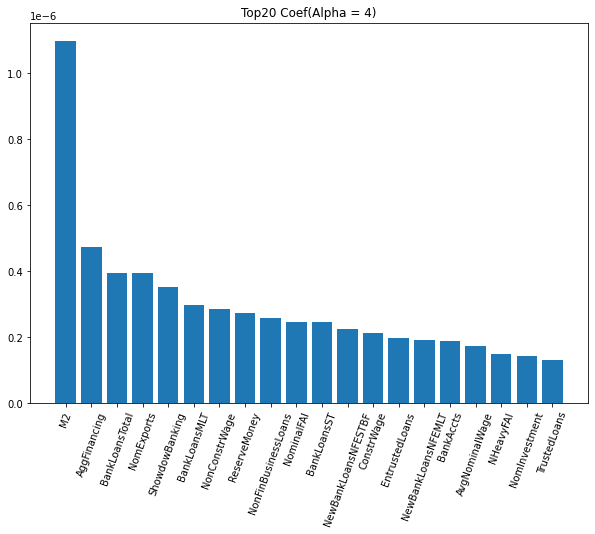

MSFE:  0.0001759346946561783
R2: (n = 4) -1.833823911990054


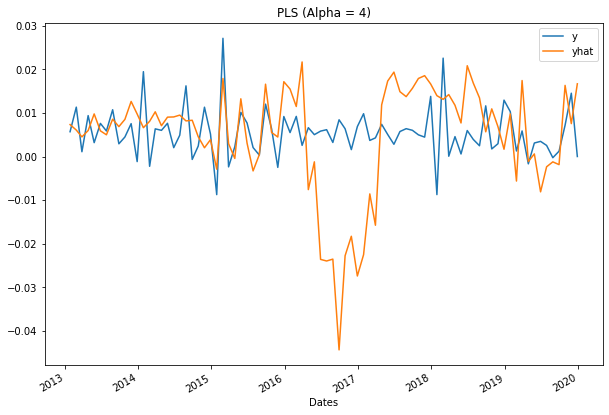

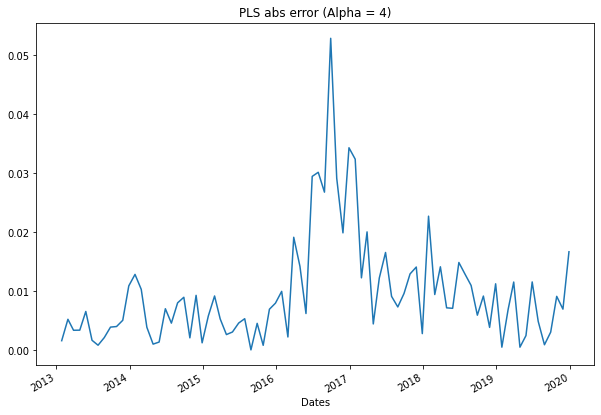

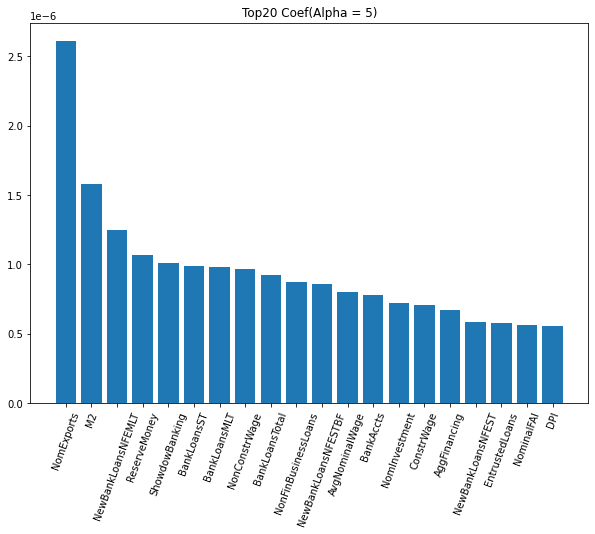

MSFE:  0.00022130086866208894
R2: (n = 5) -2.5645481670591863


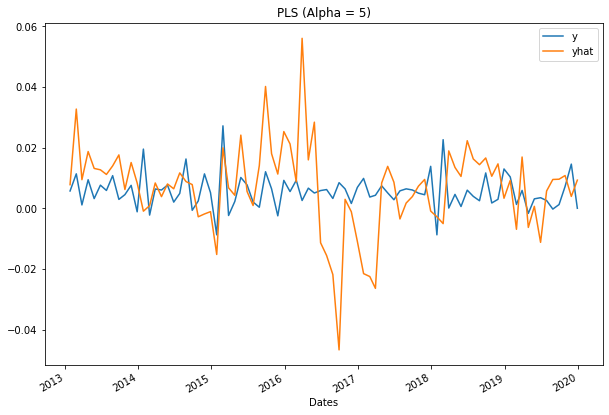

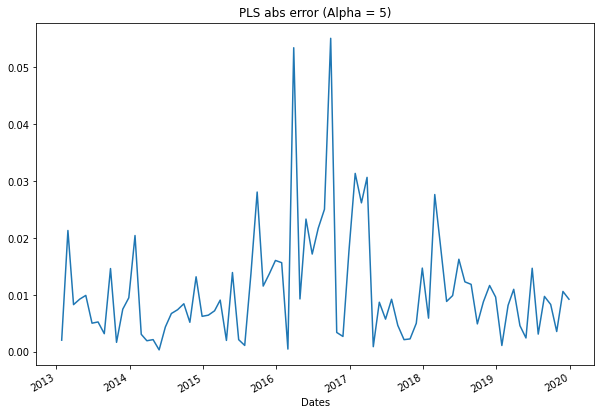

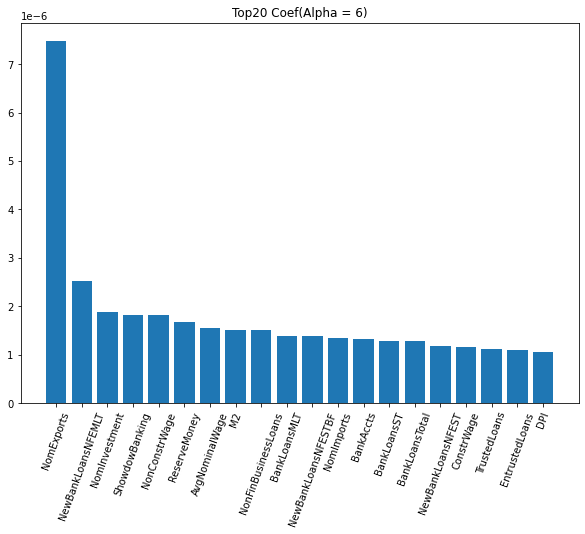

MSFE:  0.0005734518263372231
R2: (n = 6) -8.236731282732944


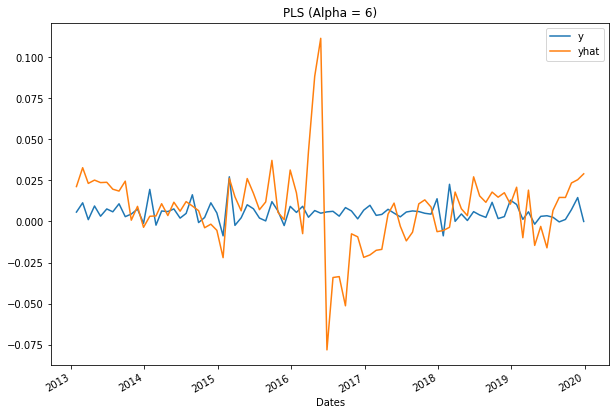

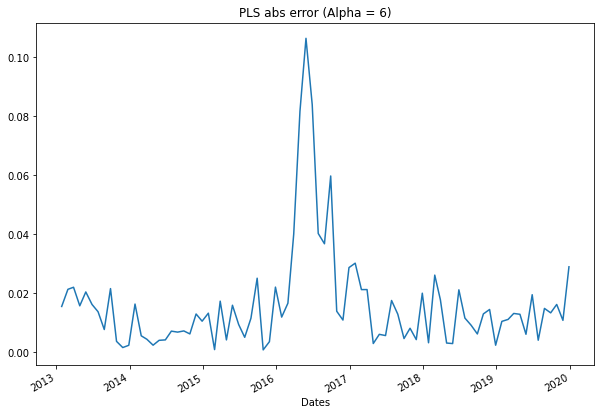

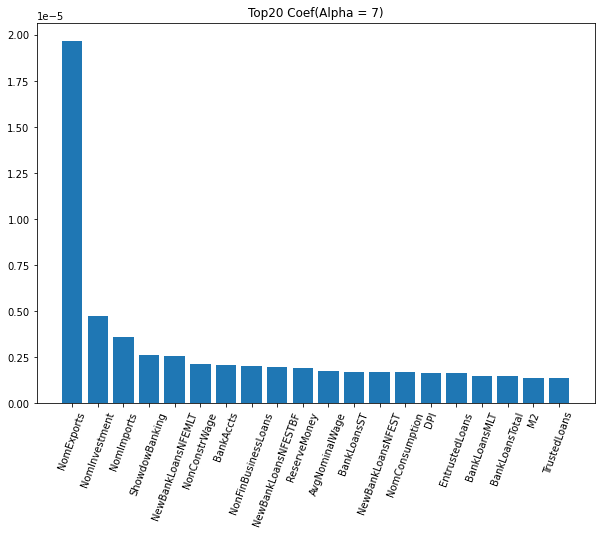

MSFE:  0.0008234109799093325
R2: (n = 7) -12.262885577073336


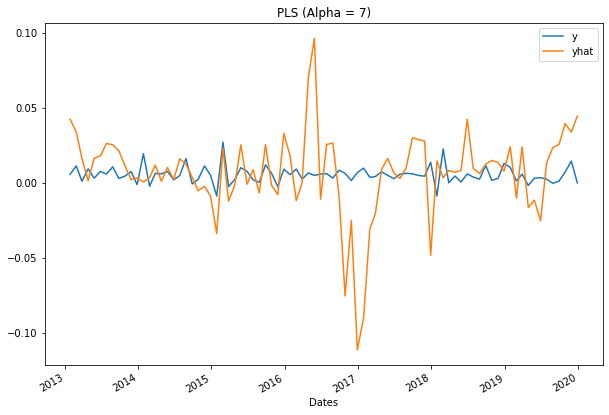

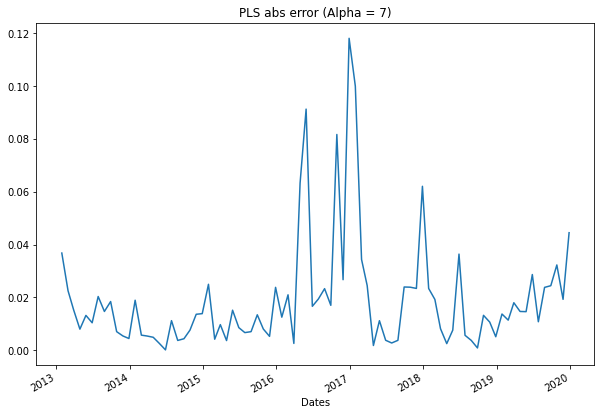

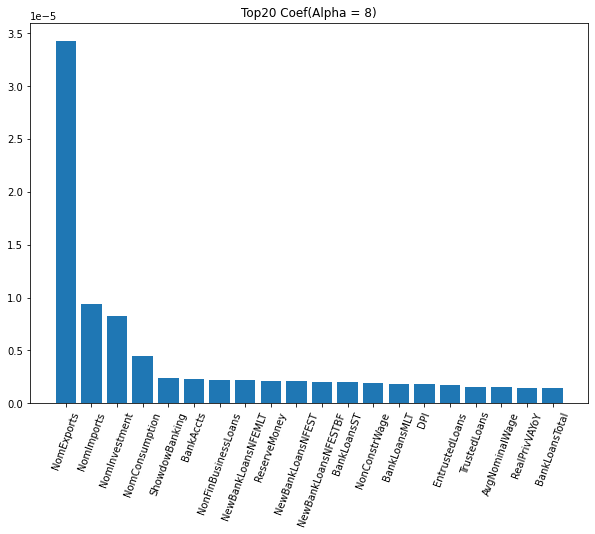

MSFE:  0.0010883791249260634
R2: (n = 8) -16.530793431925158


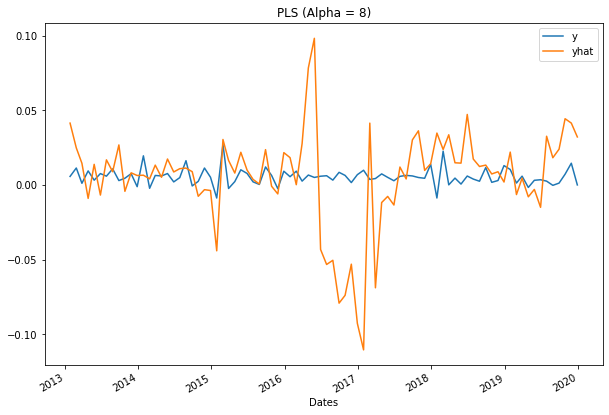

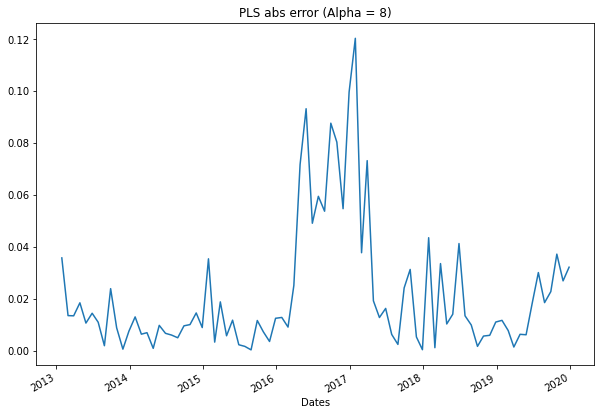

In [23]:
# deal with PLS
all_pred = []
all_best = []
all_coef = []
for i in range(len(all_month_list)):
    if i < train_month_n + test_month_n + oos_month_n - 1:
        continue
    else:
        result_idx = i - (train_month_n + test_month_n + oos_month_n - 1)
        oos_month = all_month_list[i]
        
        temp_tuning = pls_op[result_idx][0]
        temp_best = pls_op[result_idx][1]
        temp_coef = pls_op[result_idx][2]
        
        all_best.append(temp_best)
        
        temp_coef = pd.DataFrame(temp_coef).T
        temp_coef['n'] = temp_coef.index
        temp_coef['Dates'] = oos_month
        all_coef.append(temp_coef)
        all_pred.append(temp_tuning)
        
        
all_pred = pd.concat(all_pred)
all_pred['Dates'] = [datetime.datetime(year = int(x//100),month = int(x%100),day = 28) for x in all_pred['Dates']]
all_pred = all_pred.sort_values(['n','Dates'])
all_pred = all_pred.set_index(['n','Dates'])
        
     
all_coef = pd.concat(all_coef)
all_coef = all_coef.sort_values(['n','Dates'])
all_coef = all_coef.set_index(['n','Dates'])




for n in range(1,9):
    alpha_coef = all_coef.loc[n]
    plt.figure(figsize = (10,7))
    abs_coef = abs(alpha_coef).mean()
    toplot_coef = abs_coef.sort_values(ascending = False).head(20)
    plt.bar(x = list(toplot_coef.index), height = toplot_coef.values)
    plt.xticks(rotation=70)
    plt.title('Top20 Coef(Alpha = %s)'%n)
    plt.show()
    
    alpha_pred = all_pred.loc[n]
    
    msfe = np.sum((alpha_pred['yhat']-alpha_pred['y'])**2) / len(alpha_pred)
    print('MSFE: ', msfe)
    r2 = 1-np.sum((alpha_pred['yhat']-alpha_pred['y'])**2)/np.sum(alpha_pred['y']**2)
    print('R2: (n = %s)'%n, r2)
    
    alpha_pred[['y','yhat']].plot(figsize = (10,7),title = 'PLS (Alpha = %s)'%n)
    plt.show()
    
    abs(alpha_pred['y']- alpha_pred['yhat']).plot(figsize = (10,7),title = 'PLS abs error (Alpha = %s)'%n)
    plt.show()  
